 ### Forcasting -  Natural Gas Stock
 ### Stock Market Prediction And Forecasting Using Stacked LSTM 

In [1]:
#Importing the required Libraries
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Forecasting Plots
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Loading the Dataset
tsd=pd.read_csv("C:/Users/MANISHA/Desktop/Natural Gas Futures Historical Data.csv")
tsd.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 25, 2022",5.571,5.401,5.577,5.345,-,3.15%
1,"Mar 24, 2022",5.401,5.115,5.464,5.063,84.23K,3.23%
2,"Mar 23, 2022",5.232,5.147,5.330,5.092,74.54K,0.87%
3,"Mar 22, 2022",5.187,4.948,5.204,4.877,122.75K,5.86%
4,"Mar 21, 2022",4.900,4.909,4.976,4.748,75.46K,0.76%


Inference: The Dataset is loaded, this is our original dataset

###  EDA 

In [3]:
#Checking the shape of the Dataset
tsd.shape

(3897, 7)

Inference: The Dataset consists of 3897 rows & 7 columns.

In [4]:
#No of Unique Values
print('No of Unique Values in Date',len(tsd['Date'].unique()))
print('No of Unique Values in Price',len(tsd['Price'].unique()))

No of Unique Values in Date 3897
No of Unique Values in Price 2524


In [5]:
#Checking for NA Values
tsd.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

Inference: There are no NA Values present in the Dataset

In [6]:
#Checkinng the Dtypes of Column/Variable
tsd.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

Inference: Will Convert the Date (Yt) Columns into Datetime dtypes

In [7]:
# Converting "Year" column (Yt variable) to datetime
tsd['Date'] = pd.to_datetime(tsd['Date'])
tsd.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

Inference: Now "Date" column i.e t variable is converted to datetime. So mostly EDA is Done we can Now Move to Descriptive Stats & Visualization Part.

In [8]:
#Date Ranges
print("Minimum Date is :",min(tsd['Date']))
print("Maximum Date is :",max(tsd['Date']))

Minimum Date is : 2007-02-28 00:00:00
Maximum Date is : 2022-03-25 00:00:00


#### Descriptive Stats

In [9]:
#Descritive Stats of the Dataset
tsd["Price"].describe()

count    3897.000000
mean        3.892345
std         1.880477
min         1.482000
25%         2.729000
50%         3.418000
75%         4.355000
max        13.577000
Name: Price, dtype: float64

Inference: We can see here, Minimum Price is 1.482, Maximum Price is 13.577 with Average Price of 3.418 & std of 1.88

#### Visualization

In [10]:
#Converting the Year Column into Index For Visualization
tsd1=tsd.set_index(['Date'])
tsd1.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-03-25,5.571,5.401,5.577,5.345,-,3.15%
2022-03-24,5.401,5.115,5.464,5.063,84.23K,3.23%
2022-03-23,5.232,5.147,5.330,5.092,74.54K,0.87%
2022-03-22,5.187,4.948,5.204,4.877,122.75K,5.86%
2022-03-21,4.900,4.909,4.976,4.748,75.46K,0.76%


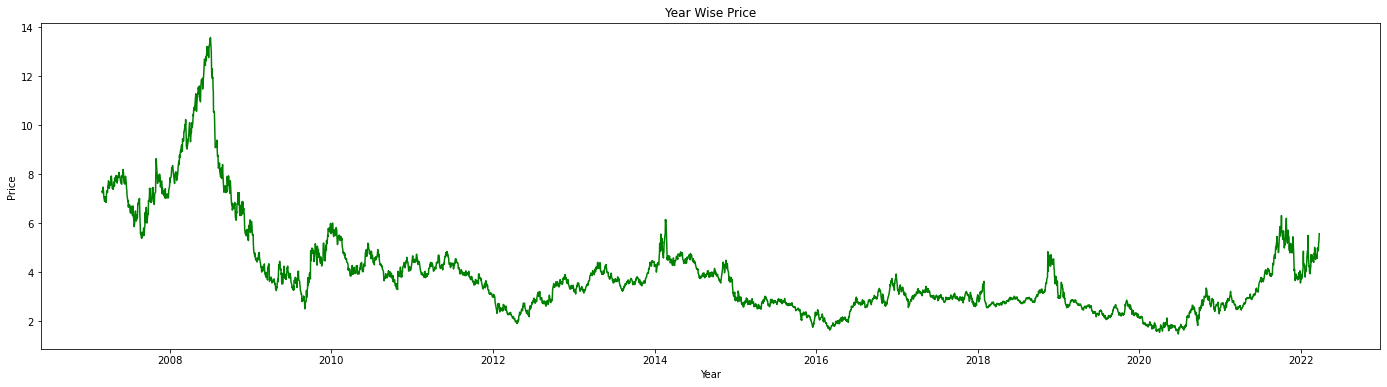

In [11]:
# Line Plot
fig = plt.figure(figsize=(24,6)) 
plt.plot(tsd1["Price"], color = 'g')
plt.xlabel('Year')                                      
plt.ylabel('Price')                                    
plt.title('Year Wise Price')
plt.show()

Inference: A Line Plot Showing Year wise Price,Here we can see Earlier (from the year 2007 to 2009) It went up Exponentially, and after 2009 it comes down Drastically.

we can also see there is no sign of seasonality(Fluctuations Changes Drastically over the period of time)

So this Timeseries data has an Exponential Trend with No Seasonal Component

#### Histogram & Density Plots

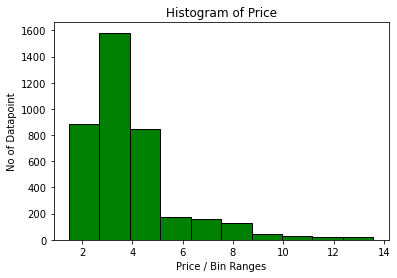

In [12]:
# Histogram
plt.hist(tsd1.Price, color ='Green',edgecolor ="black")
plt.xlabel('Price / Bin Ranges')                                      
plt.ylabel('No of Datapoint')                                    
plt.title('Histogram of Price')
plt.show()

Inference: The Data is not normally Distribution More Values are Concentrated around 1 to 5 Bin range, Will handle this problem in the later part of Model Building

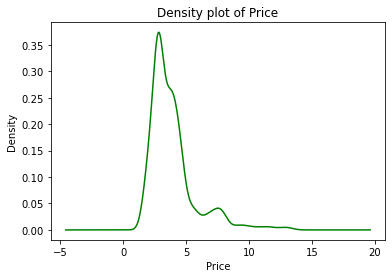

In [13]:
#Density plot
tsd1['Price'].plot(kind='kde',color='g')
plt.xlabel('Price')
plt.title('Density plot of Price')
plt.show()

Inference: The Data is not normally Distribution More Values are Concentrated around 1 to 5 Bin range, Will handle this problem in the later part of Model Building

#### Lag Plot

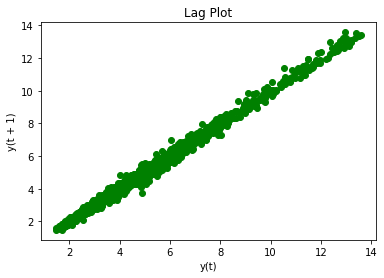

In [14]:
#A Lag Plot
lag_plot(tsd1.Price,c = 'g')
plt.title('Lag Plot')
plt.show()

Inference:There is a Linear Relationship between the Y(t) & Y(t + 1) Variable

#### Correlogram / ACF Plot

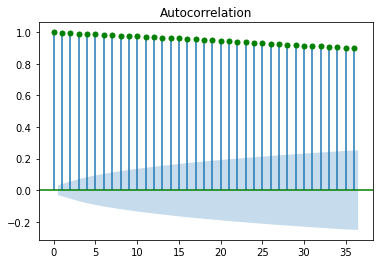

In [15]:
# A autocorrelation plot
plot_acf(tsd1.Price, c ='g')
plt.show()

Inference: This is An Autocorrelation Plot, here we can see the standard Error(SE) ranges from -0.2 to 0.2.

The lag variable which are above the standard error range then those variables are statistically significant

So in Our case the all the lagged variable are significant.

#### Time series decomposition plot

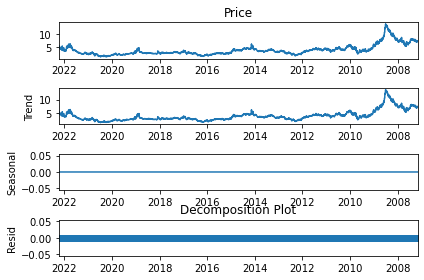

In [16]:
decompose = seasonal_decompose(tsd1.Price, period=1)
decompose.plot()
plt.title("Decomposition Plot")
plt.show()

Inference: Now We can say its Confirm there is no Seasonality only Trend

We Can Visualize it is a Exponential Trend & No Seasonality.

In [17]:
tsd1=tsd.reset_index()['Price']

In [18]:
tsd1.shape

(3897,)

In [19]:
tsd1

0       5.571
1       5.401
2       5.232
3       5.187
4       4.900
        ...  
3892    7.472
3893    7.254
3894    7.243
3895    7.288
3896    7.300
Name: Price, Length: 3897, dtype: float64

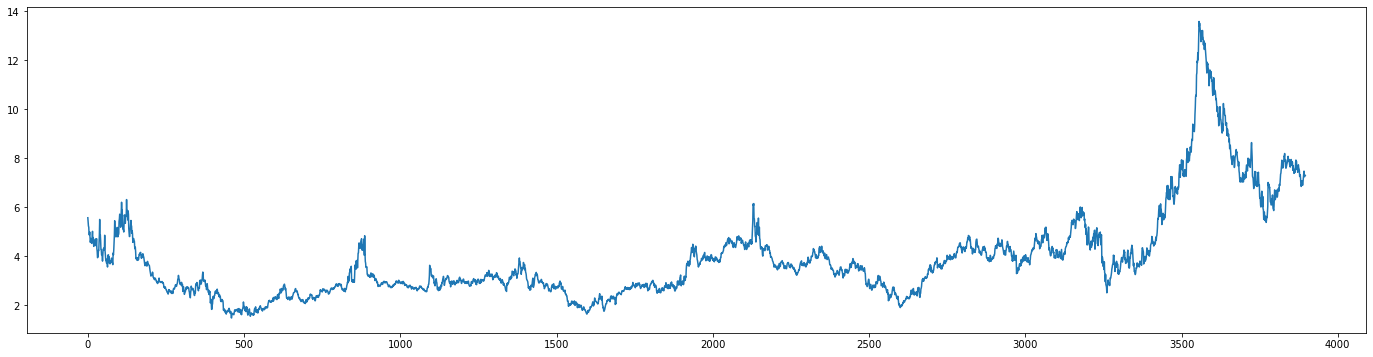

In [20]:
fig = plt.figure(figsize=(24,6)) 
plt.plot(tsd1)

In [21]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
tsd1=scaler.fit_transform(np.array(tsd1).reshape(-1,1))

In [23]:
tsd1.shape

(3897, 1)

In [24]:
print(tsd1)

[[0.33807358]
 [0.32401819]
 [0.31004547]
 ...
 [0.47631253]
 [0.48003307]
 [0.48102522]]


### Splitting dataset into train and test split

In [25]:
training_size = int(len(tsd1)*0.70)
test_size = int(len(tsd1)*0.30)
train_data,test_data = tsd1[0:training_size,:],tsd1[training_size:len(tsd1),:1]

In [26]:
len(train_data),len(test_data)

(2727, 1170)

In [27]:
train_data

array([[0.33807358],
       [0.32401819],
       [0.31004547],
       ...,
       [0.17759405],
       [0.17395618],
       [0.17122778]])

In [28]:
### convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]    ### i=0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX) , numpy.array(dataY)

In [29]:
### reshape into X=t, t+1,t+2,t+3  and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [30]:
print(X_train)

[[0.33807358 0.32401819 0.31004547 ... 0.30318313 0.28094254 0.28912774]
 [0.32401819 0.31004547 0.30632493 ... 0.28094254 0.28912774 0.32616784]
 [0.31004547 0.30632493 0.28259611 ... 0.28912774 0.32616784 0.33352625]
 ...
 [0.0697809  0.065895   0.06630839 ... 0.1742869  0.17990905 0.1754444 ]
 [0.065895   0.06630839 0.06754857 ... 0.17990905 0.1754444  0.17751137]
 [0.06630839 0.06754857 0.06506821 ... 0.1754444  0.17751137 0.17759405]]


In [31]:
print(X_train.shape), print(y_train.shape)

(2626, 100)
(2626,)


(None, None)

In [32]:
print(X_test.shape), print(y_test.shape)

(1069, 100)
(1069,)


(None, None)

In [33]:
# reshape input to be [samples,time steps ,features] which reqruired for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

### Create the LSTM Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape =(100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
X_train[:100]

array([[[0.33807358],
        [0.32401819],
        [0.31004547],
        ...,
        [0.30318313],
        [0.28094254],
        [0.28912774]],

       [[0.32401819],
        [0.31004547],
        [0.30632493],
        ...,
        [0.28094254],
        [0.28912774],
        [0.32616784]],

       [[0.31004547],
        [0.30632493],
        [0.28259611],
        ...,
        [0.28912774],
        [0.32616784],
        [0.33352625]],

       ...,

       [[0.30318313],
        [0.28094254],
        [0.28912774],
        ...,
        [0.18015709],
        [0.17924762],
        [0.17759405]],

       [[0.28094254],
        [0.28912774],
        [0.32616784],
        ...,
        [0.17924762],
        [0.17759405],
        [0.17651922]],

       [[0.28912774],
        [0.32616784],
        [0.33352625],
        ...,
        [0.17759405],
        [0.17651922],
        [0.16651509]]])

### Model fitting

In [38]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=65,verbose=1)

Epoch 1/100
41/41 [==============================] - 12s 184ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 2/100
41/41 [==============================] - 7s 167ms/step - loss: 4.6962e-04 - val_loss: 0.0019
Epoch 3/100
41/41 [==============================] - 6s 157ms/step - loss: 4.0201e-04 - val_loss: 0.0014
Epoch 4/100
41/41 [==============================] - 6s 146ms/step - loss: 3.3160e-04 - val_loss: 0.0025
Epoch 5/100
41/41 [==============================] - 6s 145ms/step - loss: 3.0334e-04 - val_loss: 0.0022
Epoch 6/100
41/41 [==============================] - 6s 150ms/step - loss: 2.8781e-04 - val_loss: 0.0017
Epoch 7/100
41/41 [==============================] - 6s 147ms/step - loss: 2.5791e-04 - val_loss: 0.0013
Epoch 8/100
41/41 [==============================] - 6s 155ms/step - loss: 2.5209e-04 - val_loss: 0.0028
Epoch 9/100
41/41 [==============================] - 7s 167ms/step - loss: 2.6225e-04 - val_loss: 0.0011
Epoch 10/100
41/41 [==============================] - 7s 1

41/41 [==============================] - 8s 185ms/step - loss: 7.4420e-05 - val_loss: 9.1975e-04
Epoch 77/100
41/41 [==============================] - 8s 203ms/step - loss: 7.0919e-05 - val_loss: 0.0010
Epoch 78/100
41/41 [==============================] - 9s 219ms/step - loss: 7.7508e-05 - val_loss: 7.0128e-04
Epoch 79/100
41/41 [==============================] - 9s 227ms/step - loss: 7.2973e-05 - val_loss: 5.2382e-04
Epoch 80/100
41/41 [==============================] - 9s 229ms/step - loss: 6.9223e-05 - val_loss: 7.4613e-04
Epoch 81/100
41/41 [==============================] - 10s 254ms/step - loss: 7.2986e-05 - val_loss: 6.1129e-04
Epoch 82/100
41/41 [==============================] - 11s 262ms/step - loss: 7.2469e-05 - val_loss: 6.9397e-04
Epoch 83/100
41/41 [==============================] - 10s 257ms/step - loss: 6.9056e-05 - val_loss: 8.4363e-04
Epoch 84/100
41/41 [==============================] - 10s 255ms/step - loss: 6.9088e-05 - val_loss: 6.7882e-04
Epoch 85/100
41/41 [===

## Make Prediction 

In [39]:
import tensorflow as tf

In [40]:
### Lets Do the prediction and checking performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [41]:
### Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [42]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3.0269903256149004

In [43]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

5.799639410196947

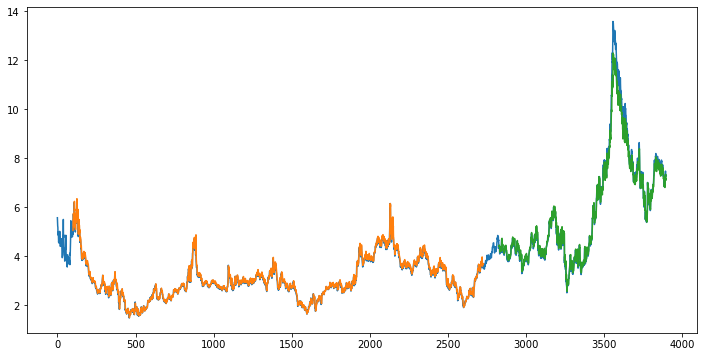

In [44]:
#ploting 
#shift train prediction for ploting
look_back = 100
trainpredictplot = np.empty_like(tsd1)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:] = train_predict

#shift test prediction for ploting
testpredictionplot = np.empty_like(tsd1)
testpredictionplot[:,:] = np.nan
testpredictionplot[len(train_predict)+(look_back*2)+1:len(tsd1)-1,:] = test_predict

#plot besline and predict
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(tsd1))
plt.plot(trainpredictplot)
plt.plot(testpredictionplot)
plt.show()

In [45]:
len(test_data)

1170

In [46]:
x_input = test_data[1070:].reshape(1,-1)
x_input.shape

(1, 100)

In [47]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.4104175279040926,
 0.43191401405539476,
 0.41719718892104174,
 0.3989251756924349,
 0.40463001240181895,
 0.42827614716825135,
 0.41463414634146345,
 0.42315006200909466,
 0.4313352625051674,
 0.4074410913600661,
 0.4102521703183133,
 0.42463828028110784,
 0.43588259611409663,
 0.43670938404299287,
 0.4374534931789995,
 0.427697395618024,
 0.4503513848697809,
 0.44605208763952053,
 0.4512608515915668,
 0.46696982224059524,
 0.4849937990905332,
 0.4885489871847871,
 0.49913187267465897,
 0.5132699462587846,
 0.5321207110376187,
 0.5230260438197601,
 0.5064902852418354,
 0.5126085159156676,
 0.5064902852418354,
 0.5110376188507647,
 0.5244315832988838,
 0.5455146754857378,
 0.544191814799504,
 0.5546920214964862,
 0.5288135593220338,
 0.5335262505167424,
 0.5340223232740802,
 0.5050847457627119,
 0.5091360066143034,
 0.512525837122778,
 0.5188094253823894,
 0.5224472922695329,
 0.5317073170731706,
 0.534270359652749,
 0.5451012815212897,
 0.5298057048367093,
 0.5276560562215792,
 0.53

### Prediction for the next 30 days

In [48]:
from numpy import array
lst_output = []
n_step = 100
i =0
while (i<30):
    if (len(temp_input)>100):
        
     ##print temp_inputab
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1,n_step,1)
        
     ##print x_input
        yhat = model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        
     ##print temp_input
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1,n_step,1))
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.47372425]
101
1 day input [0.43191401 0.41719719 0.39892518 0.40463001 0.42827615 0.41463415
 0.42315006 0.43133526 0.40744109 0.41025217 0.42463828 0.4358826
 0.43670938 0.43745349 0.4276974  0.45035138 0.44605209 0.45126085
 0.46696982 0.4849938  0.48854899 0.49913187 0.51326995 0.53212071
 0.52302604 0.50649029 0.51260852 0.50649029 0.51103762 0.52443158
 0.54551468 0.54419181 0.55469202 0.52881356 0.53352625 0.53402232
 0.50508475 0.50913601 0.51252584 0.51880943 0.52244729 0.53170732
 0.53427036 0.54510128 0.5298057  0.52765606 0.53493179 0.53054981
 0.51624638 0.51575031 0.50888797 0.52062836 0.53377429 0.5345184
 0.5165771  0.51558495 0.52757338 0.52492766 0.49822241 0.51318727
 0.5056635  0.50268706 0.4877222  0.49689955 0.49731294 0.49078131
 0.50004134 0.52244729 0.53261678 0.52691195 0.52806945 0.5013642
 0.50640761 0.49880116 0.49144274 0.51169905 0.5165771  0.50657296
 0.50235635 0.49780901 0.47722199 0.47846217 0.48267879 0.46945019
 0.44878049 0.44357172 0.44993799 0.

9 day input [[0.44382653]]
10 day input [0.41025217 0.42463828 0.4358826  0.43670938 0.43745349 0.4276974
 0.45035138 0.44605209 0.45126085 0.46696982 0.4849938  0.48854899
 0.49913187 0.51326995 0.53212071 0.52302604 0.50649029 0.51260852
 0.50649029 0.51103762 0.52443158 0.54551468 0.54419181 0.55469202
 0.52881356 0.53352625 0.53402232 0.50508475 0.50913601 0.51252584
 0.51880943 0.52244729 0.53170732 0.53427036 0.54510128 0.5298057
 0.52765606 0.53493179 0.53054981 0.51624638 0.51575031 0.50888797
 0.52062836 0.53377429 0.5345184  0.5165771  0.51558495 0.52757338
 0.52492766 0.49822241 0.51318727 0.5056635  0.50268706 0.4877222
 0.49689955 0.49731294 0.49078131 0.50004134 0.52244729 0.53261678
 0.52691195 0.52806945 0.5013642  0.50640761 0.49880116 0.49144274
 0.51169905 0.5165771  0.50657296 0.50235635 0.49780901 0.47722199
 0.47846217 0.48267879 0.46945019 0.44878049 0.44357172 0.44993799
 0.45283175 0.46308392 0.44729227 0.44894585 0.46308392 0.47598181
 0.48648202 0.49524597 0.

18 day input [[0.42382318]]
19 day input [0.46696982 0.4849938  0.48854899 0.49913187 0.51326995 0.53212071
 0.52302604 0.50649029 0.51260852 0.50649029 0.51103762 0.52443158
 0.54551468 0.54419181 0.55469202 0.52881356 0.53352625 0.53402232
 0.50508475 0.50913601 0.51252584 0.51880943 0.52244729 0.53170732
 0.53427036 0.54510128 0.5298057  0.52765606 0.53493179 0.53054981
 0.51624638 0.51575031 0.50888797 0.52062836 0.53377429 0.5345184
 0.5165771  0.51558495 0.52757338 0.52492766 0.49822241 0.51318727
 0.5056635  0.50268706 0.4877222  0.49689955 0.49731294 0.49078131
 0.50004134 0.52244729 0.53261678 0.52691195 0.52806945 0.5013642
 0.50640761 0.49880116 0.49144274 0.51169905 0.5165771  0.50657296
 0.50235635 0.49780901 0.47722199 0.47846217 0.48267879 0.46945019
 0.44878049 0.44357172 0.44993799 0.45283175 0.46308392 0.44729227
 0.44894585 0.46308392 0.47598181 0.48648202 0.49524597 0.47722199
 0.47631253 0.48003307 0.48102522 0.47372425 0.46639875 0.46105123
 0.45708174 0.45416304 

28 day input [[0.41033846]]
29 day input [0.51103762 0.52443158 0.54551468 0.54419181 0.55469202 0.52881356
 0.53352625 0.53402232 0.50508475 0.50913601 0.51252584 0.51880943
 0.52244729 0.53170732 0.53427036 0.54510128 0.5298057  0.52765606
 0.53493179 0.53054981 0.51624638 0.51575031 0.50888797 0.52062836
 0.53377429 0.5345184  0.5165771  0.51558495 0.52757338 0.52492766
 0.49822241 0.51318727 0.5056635  0.50268706 0.4877222  0.49689955
 0.49731294 0.49078131 0.50004134 0.52244729 0.53261678 0.52691195
 0.52806945 0.5013642  0.50640761 0.49880116 0.49144274 0.51169905
 0.5165771  0.50657296 0.50235635 0.49780901 0.47722199 0.47846217
 0.48267879 0.46945019 0.44878049 0.44357172 0.44993799 0.45283175
 0.46308392 0.44729227 0.44894585 0.46308392 0.47598181 0.48648202
 0.49524597 0.47722199 0.47631253 0.48003307 0.48102522 0.47372425
 0.46639875 0.46105123 0.45708174 0.45416304 0.45188165 0.44989291
 0.44796109 0.44595543 0.44382653 0.44157889 0.43924677 0.43687552
 0.43451038 0.4321904

In [49]:
day_new = np.arange(1,101)
day_pred =np.arange(101,131)

In [50]:
len(tsd1)

3897

In [51]:
tsd2 = tsd1.tolist()
tsd2.extend(lst_output)

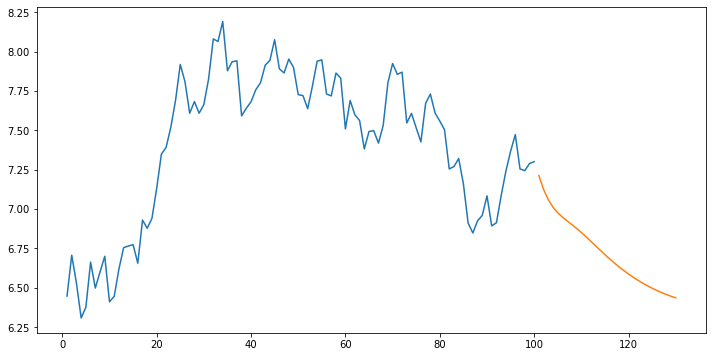

In [52]:
plt.figure(figsize=(12,6))
plt.plot(day_new,scaler.inverse_transform(tsd1[3797:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

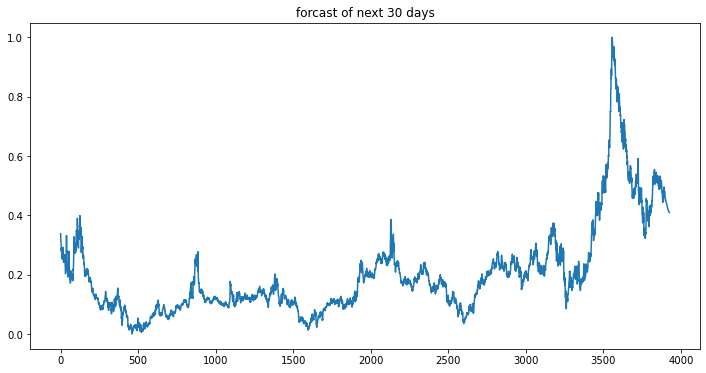

In [53]:
tsd2 = tsd1.tolist()
tsd2.extend(lst_output)
plt.figure(figsize=(12,6))
plt.title("forcast of next 30 days")
plt.plot(tsd2[0:])

In [54]:
tsd2 = scaler.inverse_transform(tsd2).tolist()

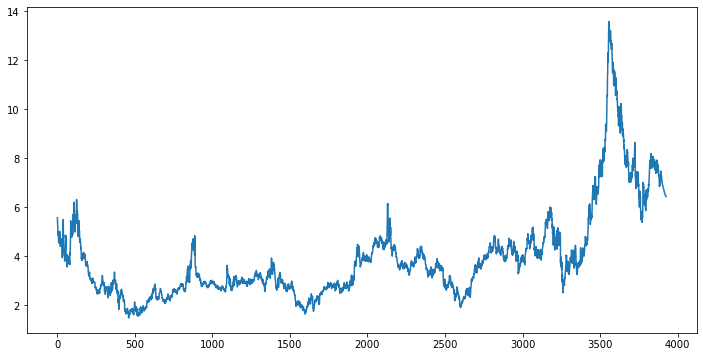

In [55]:
plt.figure(figsize=(12,6))
plt.plot(tsd2)

In [56]:
# .sav file
from keras.models import load_model 
model.save('my_model.h5')  
# creates a HDF5 file 'my_model.h5'
model = load_model('my_model.h5')

In [57]:
# .pickle file
import pickle
with open('Natural Gas_final_df.pickle','wb') as f:
    pickle.dump(model,f)

INFO:tensorflow:Assets written to: ram://c0190a3d-5e8e-4385-8895-8bfb611805a8/assets


INFO:tensorflow:Assets written to: ram://c0190a3d-5e8e-4385-8895-8bfb611805a8/assets


NotFoundError: 

In [ ]:
np.savetxt('data.csv',test_data,delimiter=',')

In [ ]:
test_data

In [ ]:
arr = np.loadtxt("data.csv", delimiter=",")
arr